   Price Maintenance  Capacity Airbag Profitable
0    Low         Low         2     No        Yes
1    Low         Med         4    Yes        Yes
2    Low         Low         4     No        Yes
3    Low         Med         4     No         No
4    Low        High         4     No         No
5    Med         Med         4     No         No
6    Med         Med         4    Yes        Yes
7    Med        High         2    Yes         No
8    Med        High         5     No        Yes
9   High         Med         4    Yes        Yes
10  High         Med         2    Yes        Yes
11  High        High         2    Yes         No
12  High        High         5    Yes        Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price        13 non-null     object
 1   Maintenance  13 non-null     object
 2   Capacity     13 non-null     int64 
 3   Ai

[Text(0.5, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.25, 0.625, 'x[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.625, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.375, 'x[1] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

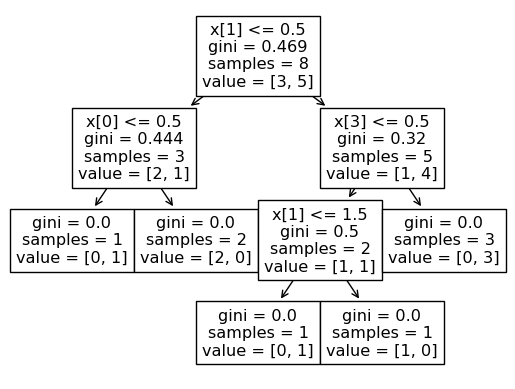

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
data = {'Price': ['Low','Low','Low','Low','Low','Med','Med','Med','Med','High','High','High','High'],
'Maintenance':['Low','Med','Low','Med','High','Med','Med','High','High','Med','Med','High','High'],
'Capacity': [2,4,4,4,4,4,4,2,5,4,2,2,5,],
'Airbag':['No','Yes','No','No','No','No','Yes','Yes','No','Yes','Yes','Yes','Yes'],
'Profitable':['Yes','Yes','Yes','No','No','No','Yes','No','Yes','Yes','Yes','No','Yes']
}
df=pd.DataFrame(data)
print(df)
df.info()
df.isnull().sum()
X = df.drop(['Profitable'], axis=1)
y = df['Profitable']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
# check the shape of X_train and X_test
X_train.shape, X_test.shape
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))
